In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
df= pd.read_csv(r"C:\Users\dell\Downloads\student_feedback.csv")
df

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9
...,...,...,...,...,...,...,...,...,...,...
996,996,55,8,7,6,2,5,7,7,9
997,997,913,5,5,6,5,6,7,6,1
998,998,199,9,5,8,3,8,1,1,2
999,999,539,10,2,7,4,3,4,10,1


In [7]:
print(df.columns)

Index(['Unnamed: 0', 'Student ID', 'Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance'],
      dtype='object')


In [8]:
print(df.info)

<bound method DataFrame.info of       Unnamed: 0  Student ID  Well versed with the subject  \
0              0         340                             5   
1              1         253                             6   
2              2         680                             7   
3              3         806                             9   
4              4         632                             8   
...          ...         ...                           ...   
996          996          55                             8   
997          997         913                             5   
998          998         199                             9   
999          999         539                            10   
1000        1000         759                             7   

      Explains concepts in an understandable way  Use of presentations  \
0                                              2                     7   
1                                              5                     8   
2

In [16]:
sample_feedback = [
    "Great teaching style and very helpful!",
    "Too many assignments, need balance.",
    "The presentations were very clear.",
    "Concepts were explained in detail.",
    "Sometimes explanations were confusing.",
    "Support was excellent and motivating.",
    "Assignments were too difficult.",
    "Overall, the course was relevant and useful.",
    "Could use more real-world examples.",
    "Very satisfied with the teaching."
]

# Randomly assign comments to each student
np.random.seed(42)
df["Feedback Comments"] = np.random.choice(sample_feedback, size=len(df))

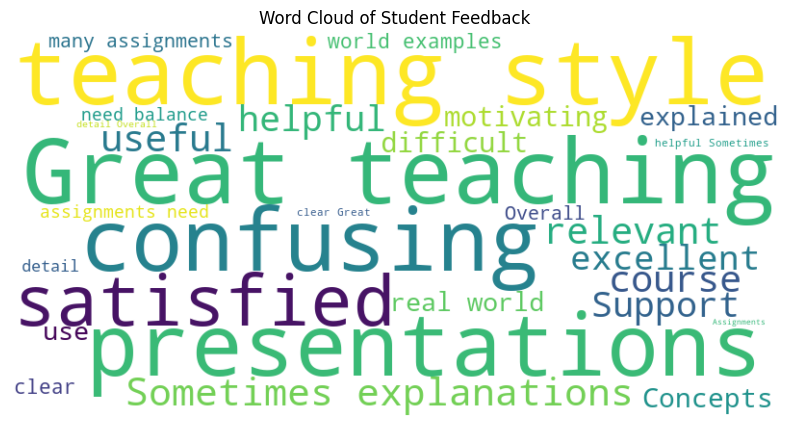

In [18]:
all_text = " ".join(df["Feedback Comments"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Student Feedback")
plt.show()

In [19]:
df.to_csv("processed_student_feedback.csv", index=False)

# Showing sample with feedback + sentiment
df.head()

,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance,Feedback Comments
0,340,5,2,7,6,9,2,1,8,Assignments were too difficult.
1,253,6,5,8,6,2,1,2,9,Concepts were explained in detail.
2,680,7,7,6,5,4,2,3,1,"Overall, the course was relevant and useful."
3,806,9,6,7,1,5,9,4,6,Sometimes explanations were confusing.
4,632,8,10,8,4,6,6,9,9,Assignments were too difficult.


C:\Users\dell\AppData\Local\Temp\ipykernel_24912\1299932700.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette="viridis")


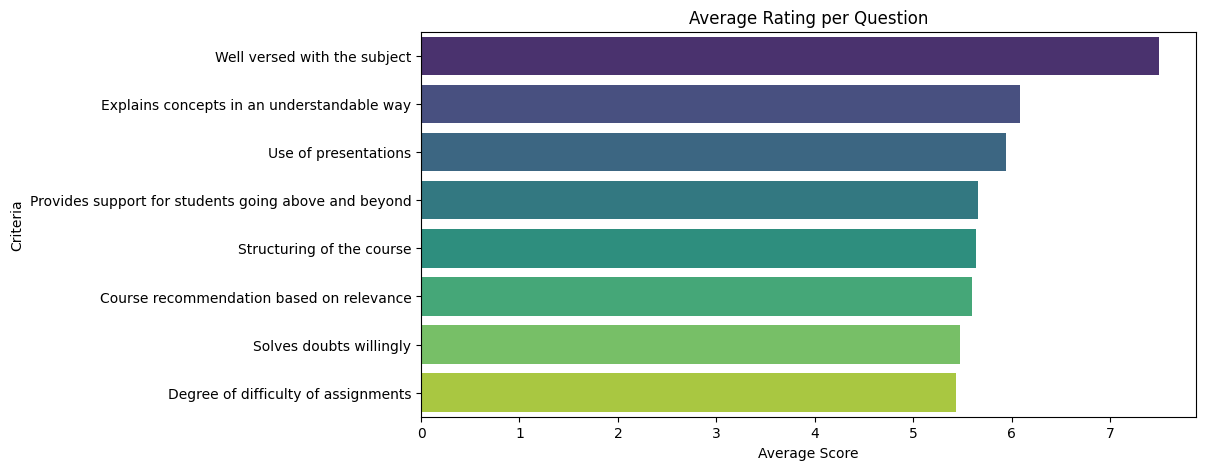

📊 Average Ratings:

Well versed with the subject                            7.497502
Explains concepts in an understandable way              6.081918
Use of presentations                                    5.942058
Provides support for students going above and beyond    5.662338
Structuring of the course                               5.636364
Course recommendation based on relevance                5.598402
Solves doubts willingly                                 5.474525
Degree of difficulty of assignments                     5.430569
dtype: float64


In [26]:
rating_columns = [
    'Well versed with the subject',
    'Explains concepts in an understandable way',
    'Use of presentations',
    'Degree of difficulty of assignments',
    'Solves doubts willingly',
    'Structuring of the course',
    'Provides support for students going above and beyond',
    'Course recommendation based on relevance'
]

# Mean rating per question
avg_ratings = df[rating_columns].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))

sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette="viridis")

plt.title("Average Rating per Question")
plt.xlabel("Average Score")
plt.ylabel("Criteria")
plt.show()

print("📊 Average Ratings:\n")
print(avg_ratings)

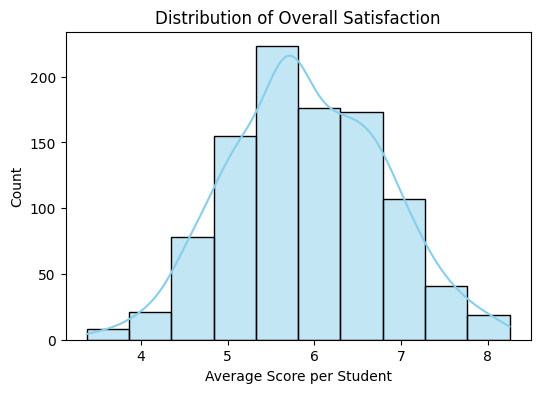

In [27]:
df["Overall Satisfaction"] = df[rating_columns].mean(axis=1)

plt.figure(figsize=(6,4))
sns.histplot(df["Overall Satisfaction"], bins=10, kde=True, color="skyblue")
plt.title("Distribution of Overall Satisfaction")
plt.xlabel("Average Score per Student")
plt.show()

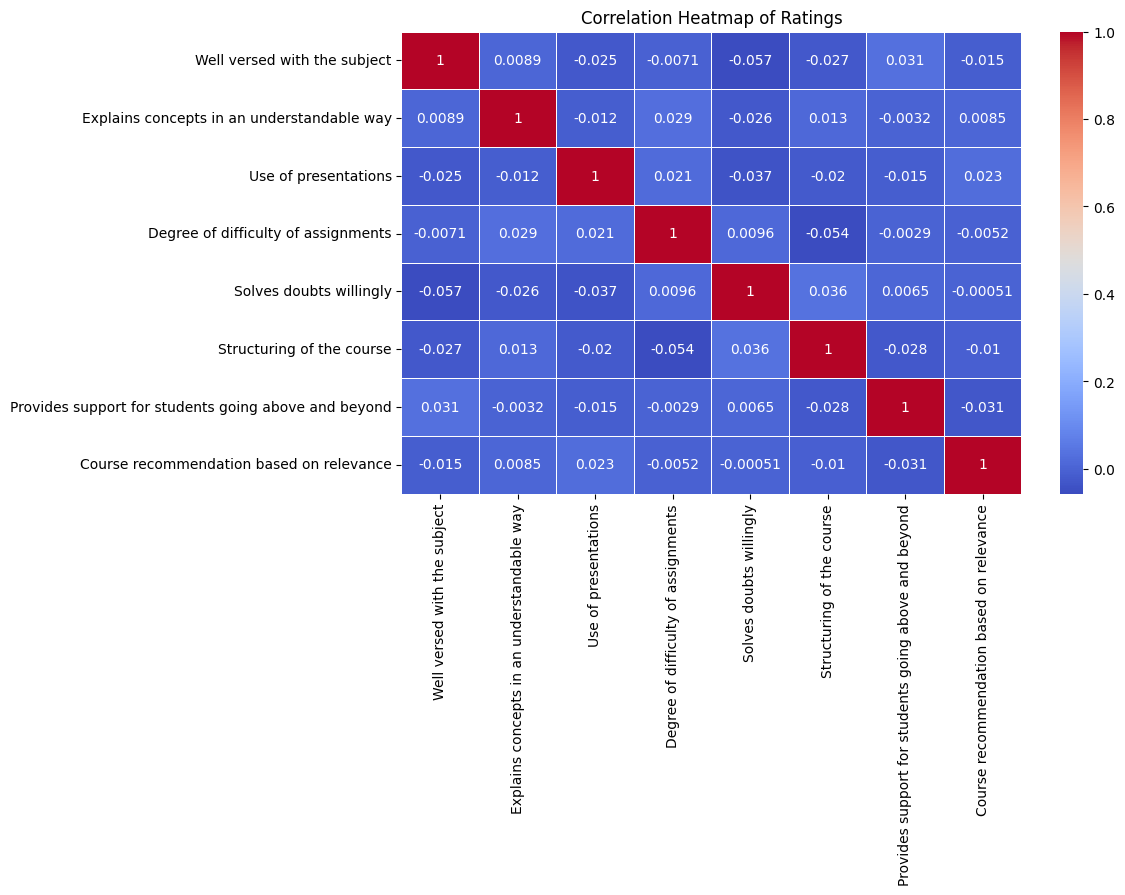

In [22]:
plt.figure(figsize=(10,6))
corr = df[rating_columns].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Ratings")
plt.show()

In [23]:
print("\n✅ Top 3 Strengths (Highest Avg Ratings):")
print(avg_ratings.head(3))

print("\n⚠️ Top 3 Areas to Improve (Lowest Avg Ratings):")
print(avg_ratings.tail(3))


✅ Top 3 Strengths (Highest Avg Ratings):
Well versed with the subject                  7.497502
Explains concepts in an understandable way    6.081918
Use of presentations                          5.942058
dtype: float64

⚠️ Top 3 Areas to Improve (Lowest Avg Ratings):
Course recommendation based on relevance    5.598402
Solves doubts willingly                     5.474525
Degree of difficulty of assignments         5.430569
dtype: float64
